<a href="https://colab.research.google.com/github/ash12hub/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Ashwin_Raghav_Swamy_LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
#!pip install --upgrade seaborn

In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

if __name__ == '__main__':
    start()
    del start  # Clean up namespace in the interpreter

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


In [0]:
csv_dict = {
    'income': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv',
    'lifespan': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv',
    'population': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv',
    'entities': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv',
    'concepts': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv'
}

dfs = {}

for k in csv_dict:
  dfs[k] = pd.read_csv(csv_dict[k])

In [0]:
dfs.keys()

dict_keys(['income', 'lifespan', 'population', 'entities', 'concepts'])

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
dfs['income'].head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
dfs['lifespan'].head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
dfs['population'].head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
dfs['entities'].head().T

,0,1,2,3,4
country,abkh,abw,afg,ago,aia
alt_5,NaN,NaN,NaN,NaN,NaN
alternative_1,NaN,NaN,Islamic Republic of A...,NaN,NaN
alternative_2,NaN,NaN,NaN,NaN,NaN
alternative_3,NaN,NaN,NaN,NaN,NaN
alternative_4_cdiac,NaN,Aruba,Afghanistan,Angola,NaN
arb1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
name,Abkhazia,Aruba,Afghanistan,Angola,Anguilla
pandg,NaN,NaN,AFGHANISTAN,ANGOLA,NaN


In [0]:
df = pd.merge(dfs['income'], dfs['lifespan'])
df = pd.merge(df, dfs['population'])

In [0]:
df_v2 = dfs['income'].merge(dfs['lifespan']).merge(dfs['population'])
#df = pd.merge(dfs['income'], dfs['lifespan'])
df_v2.sample(10)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
38061,usa,1833,2905,39.41,14675576
28802,phl,1991,3889,67.34,63508459
38127,usa,1899,6748,48.55,76321444
10360,dom,1992,5652,71.39,7468551
2903,bfa,1809,480,29.20,1665421
17568,isl,1973,18576,74.54,212814
7506,cod,1813,511,31.60,5173637
5170,brb,1886,1429,32.45,177429
5955,bwa,2014,15915,63.67,2168573
27458,npl,1961,965,44.32,10221759


In [0]:
df.equals(df_v2)

True

In [0]:
dfs['entities'][['country', 'name', 'world_6region']].sample(5)

,country,name,world_6region
68,dza,Algeria,middle_east_north_africa
71,eri,Eritrea,sub_saharan_africa
26,bhs,Bahamas,america
172,nfk,Norfolk Island,east_asia_pacific
159,mng,Mongolia,east_asia_pacific


In [0]:
df = pd.merge(df, dfs['entities'][['country', 'name', 'world_6region']], left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
col_name_map = {
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}
df = df.rename(columns = col_name_map)
df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
df.shape

(40437, 6)

## Explore data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region        40437 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [0]:
df.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [0]:
df.describe()

,year,income,lifespan,population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [0]:
df[df['lifespan'] == 1]

,year,income,lifespan,population,country,region
12214,1875,949,1.0,128811,Fiji,east_asia_pacific


In [0]:
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Belize,europe_central_asia
freq,219,10778


In [0]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [0]:
df['country'].nunique()

187

In [0]:
df[df['year'] >= 2000].describe()

,year,income,lifespan,population
count,3547.0000,3547.0000,3547.0000,3.5470e+03
mean,2008.9856,15994.4080,69.9734,3.6647e+07
std,5.4714,18919.6032,8.8646,1.3652e+08
min,2000.0000,504.0000,32.1100,5.2055e+04
25%,2004.0000,2868.5000,64.0000,2.1135e+06
50%,2009.0000,8977.0000,72.0300,8.2296e+06
75%,2014.0000,21954.5000,76.7650,2.4908e+07
max,2018.0000,129350.0000,84.1700,1.4150e+09


In [0]:
usa = df[df['country'] == "United States"]
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [0]:
usa['year'].isin([1850, 1950])

38028    False
38029    False
38030    False
38031    False
38032    False
38033    False
38034    False
         ...  
38240    False
38241    False
38242    False
38243    False
38244    False
38245    False
38246    False
Name: year, dtype: bool

In [0]:
china = df[df['country'] == "China"]
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [0]:
now = df[df['year'] == 2018]
now.shape

(184, 6)

In [0]:
now.sample(10)

,year,income,lifespan,population,country,region
3331,2018,3722,73.41,166368149,Bangladesh,south_asia
32333,2018,1492,60.00,7719729,Sierra Leone,sub_saharan_africa
7054,2018,16018,76.92,1415045928,China,east_asia_pacific
29705,2018,27909,81.30,10291196,Portugal,europe_central_asia
27953,2018,38900,78.06,4829946,Oman,middle_east_north_africa
22431,2018,25524,75.13,1929938,Latvia,europe_central_asia
28829,2018,7957,70.55,106512074,Philippines,east_asia_pacific
15642,2018,4591,73.06,9417167,Honduras,america
38027,2018,21254,77.57,3469551,Uruguay,america
9901,2018,3539,67.10,971408,Djibouti,middle_east_north_africa


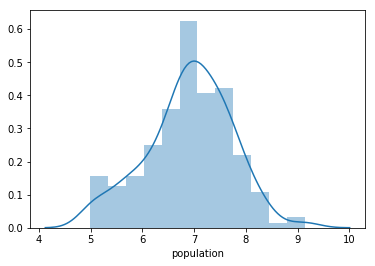

In [0]:
sns.distplot(np.log10(now['population']))

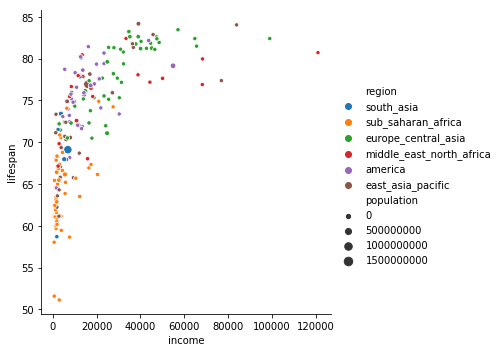

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

## Analyze outliers

In [0]:
now[now['income'] > 80000].sort_values('income')

,year,income,lifespan,population,country,region
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa


In [0]:
now[now['income'] < 1000].sort_values('income')

,year,income,lifespan,population,country,region
32771,2018,629,58.03,15181925,Somalia,sub_saharan_africa
6178,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
2455,2018,691,61.14,11216450,Burundi,sub_saharan_africa
7711,2018,751,62.42,84004989,"Congo, Dem. Rep.",sub_saharan_africa
20898,2018,801,65.43,4853516,Liberia,sub_saharan_africa
26420,2018,949,62.45,22311375,Niger,sub_saharan_africa


In [0]:
now[now['lifespan'] < 60].sort_values('lifespan')

,year,income,lifespan,population,country,region
21774,2018,2960,51.12,2263010,Lesotho,sub_saharan_africa
6178,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
32771,2018,629,58.03,15181925,Somalia,sub_saharan_africa
34523,2018,7604,58.64,1391385,Swaziland,sub_saharan_africa
218,2018,1867,58.69,36373176,Afghanistan,south_asia
40217,2018,3865,59.45,17609178,Zambia,sub_saharan_africa
14328,2018,1547,59.66,1907268,Guinea-Bissau,sub_saharan_africa


In [0]:
def plot_annotate_country(country_name, text_ann):
  country = now[now['country'] == country_name]
  country_income = country['income'].values[0]
  country_lifespan = country['lifespan'].values[0]
  sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
  plt.text(country_income-5000, country_lifespan+1, country_name)
  plt.title(f'{country_name} {text_ann}')

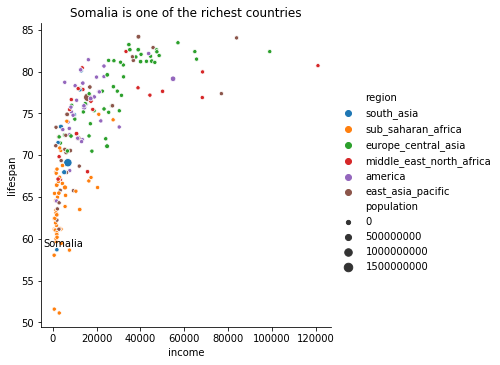

In [0]:
country_name = 'Somalia'
text_ann = 'is one of the richest countries'
plot_annotate_country(country_name, text_ann)

## Plot multiple years

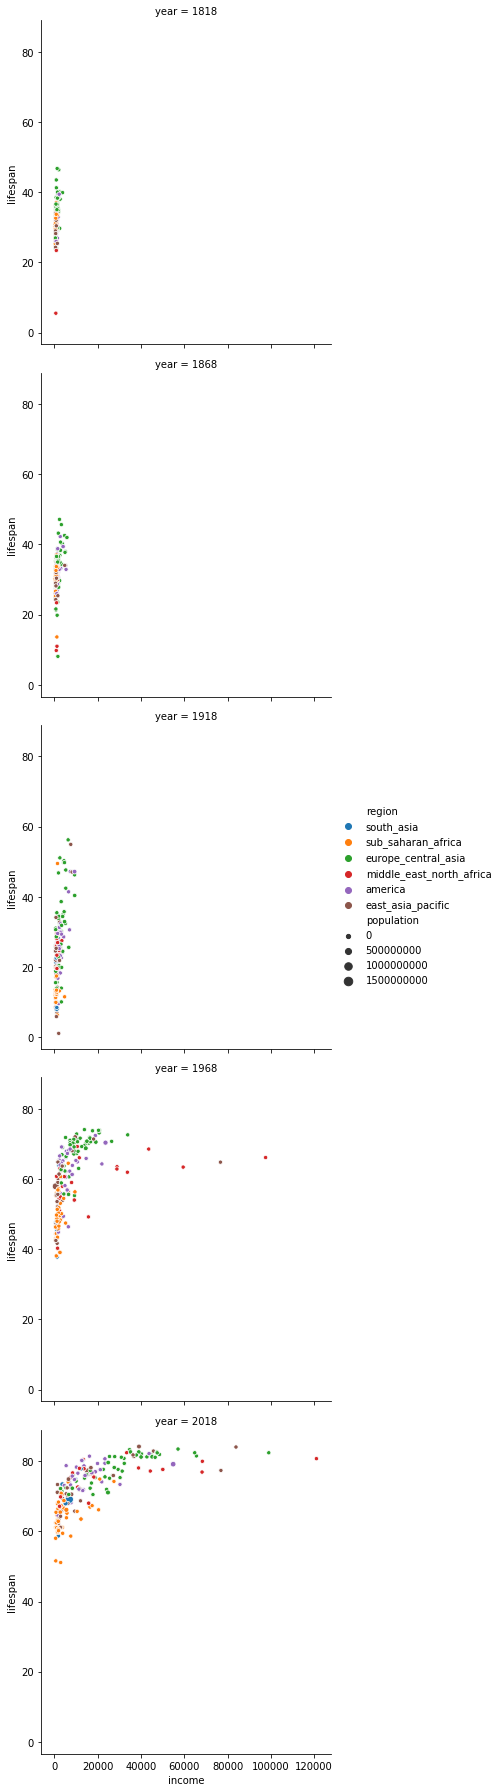

In [0]:
sns.relplot(x='income',
            y='lifespan',
            hue='region',
            size='population',
            data=df[df['year'].isin(range(1818, 2019, 50))],
            row='year')

## Point out a story

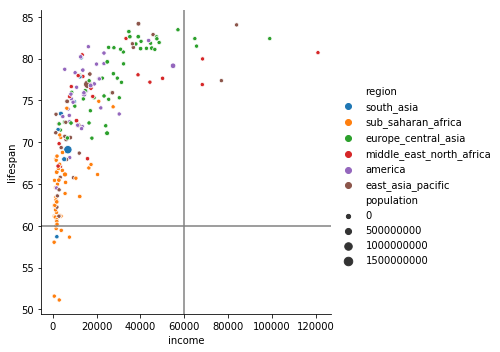

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
plt.axhline(y=60, color='grey')
plt.axvline(x=60000, color='grey')

Text(0.5, 1.0, '1937')

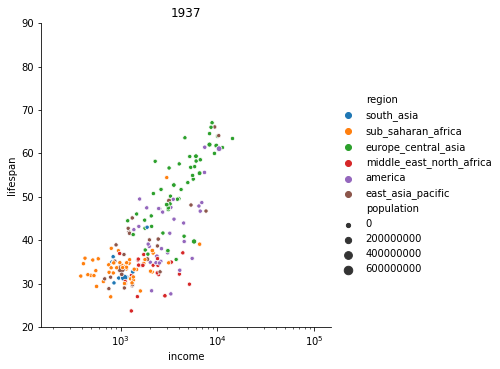

In [0]:
year = 1937 #@param {type: "slider", min: 1800, max: 2018, step: 1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=df[df.year == year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

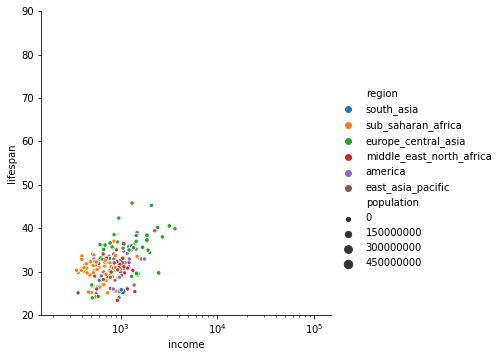

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

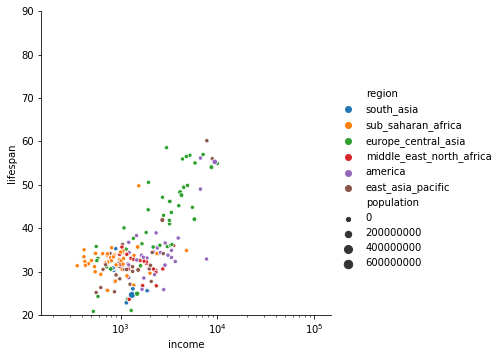

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

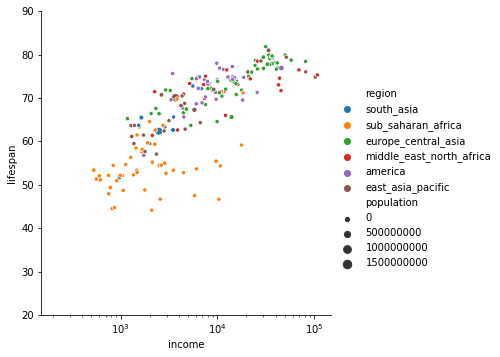

<IPython.core.display.Javascript object>

In [0]:
from google.colab import widgets

years = [1819, 1919, 2000]
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
  sns.relplot(x='income', y='lifespan', hue='region', size='population', data=df[df.year==year])
  
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((20, 90))

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
new_csv_dict={
    "income": "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv",
    "lifespan": "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv",
    "population": "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv",
    "entities": "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv",
    "concepts": "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv"
}
new_csv_dict.keys()
new_dfs={}
for k in new_csv_dict:
  new_dfs[k] = pd.read_csv(new_csv_dict[k])

new_dfs.keys()

dict_keys(['income', 'lifespan', 'population', 'entities', 'concepts'])

In [0]:
new_df = pd.merge(new_dfs['income'], new_dfs['lifespan'])
new_df = pd.merge(new_df, new_dfs['population'])
new_df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
new_df_v2 = dfs['income'].merge(dfs['lifespan']).merge(dfs['population'])
new_df_v2.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
new_dfs['entities'][['country', 'name', 'world_6region']]
new_df = pd.merge(new_df, new_dfs['entities'][['country', 'name', 'world_6region']], left_on="geo", right_on="country")
new_df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
new_df = new_df.drop(columns=["geo", "country"])
new_df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
new_col_name_map = {
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}

new_df = new_df.rename(columns=new_col_name_map);
new_df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region        40437 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [0]:
new_df.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [0]:
new_df.describe()

,year,income,lifespan,population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [0]:
new_df[new_df['lifespan'] == 1]

,year,income,lifespan,population,country,region
12214,1875,949,1.0,128811,Fiji,east_asia_pacific


In [0]:
new_df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Belize,europe_central_asia
freq,219,10778


In [0]:
new_df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [0]:
new_df['country'].nunique()

187

In [0]:
usa = new_df[new_df['country'] == "United States"]
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [0]:
zambia = new_df[new_df['country'] == "Zambia"]
zambia[zambia['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
40017,1818,693,32.60,747000,Zambia,sub_saharan_africa
40117,1918,1025,13.42,921924,Zambia,sub_saharan_africa
40217,2018,3865,59.45,17609178,Zambia,sub_saharan_africa


In [0]:
new_now = new_df[new_df['year'] == 2018]
new_now.head()

,year,income,lifespan,population,country,region
218,2018,1867,58.69,36373176,Afghanistan,south_asia
437,2018,5846,65.19,30774205,Angola,sub_saharan_africa
656,2018,12424,78.01,2934363,Albania,europe_central_asia
922,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa
1141,2018,18942,76.97,44688864,Argentina,america


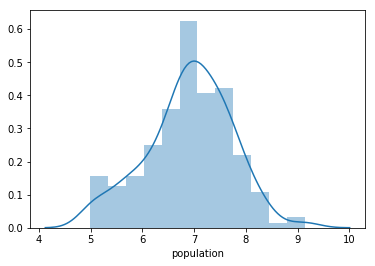

In [0]:
sns.distplot(np.log10(new_now['population']))

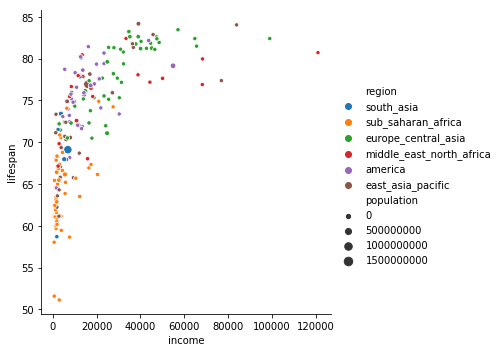

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=new_now)

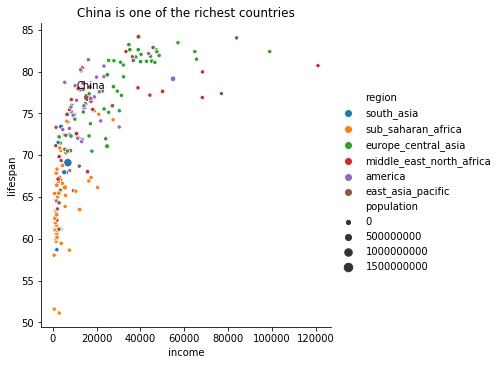

In [0]:
country_name = 'China'
text_ann = 'is one of the richest countries'
plot_annotate_country(country_name, text_ann)

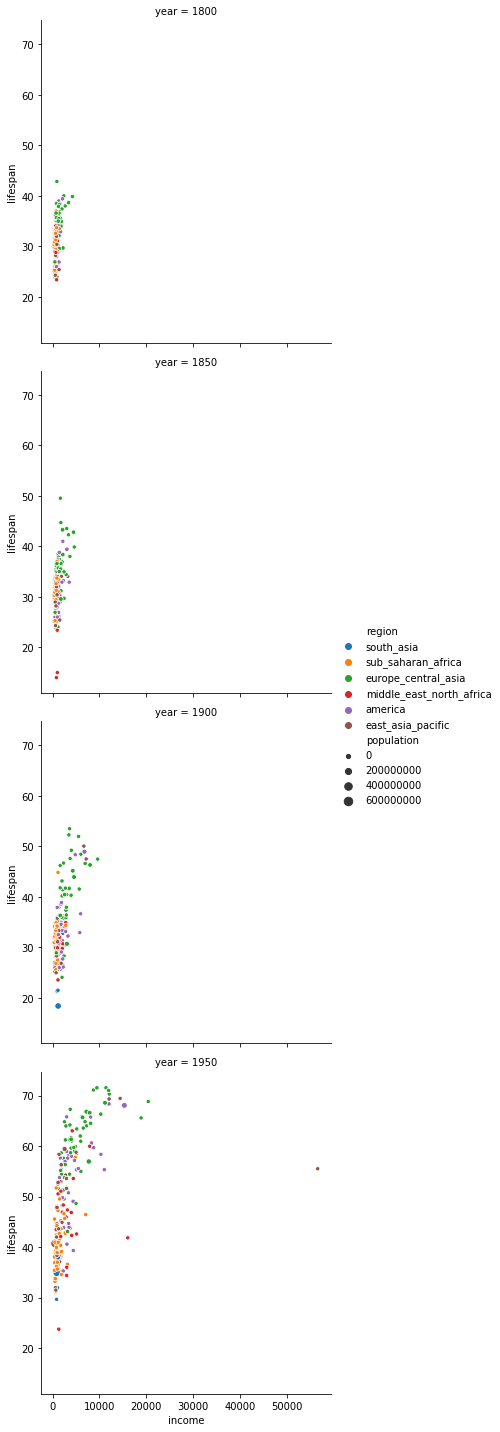

In [0]:
sns.relplot(x='income',
            y='lifespan',
            hue='region',
            size='population',
            data=df[df['year'].isin(range(1800, 2000, 50))],
            row='year')

Text(0.5, 1.0, '2000')

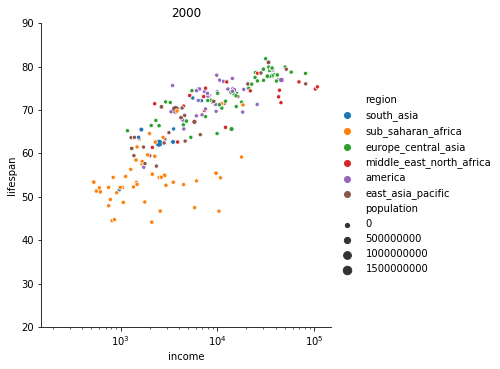

In [0]:
new_year = 1984 #@param {type: "slider", min: 1800, max: 2018, step: 1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=df[df.year == year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

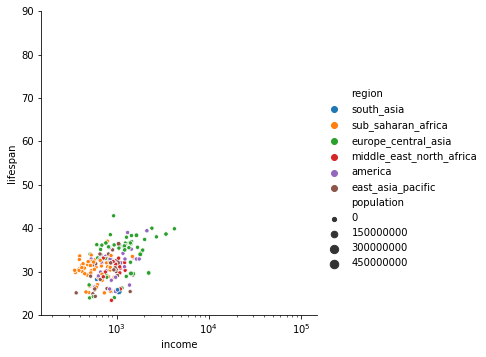

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

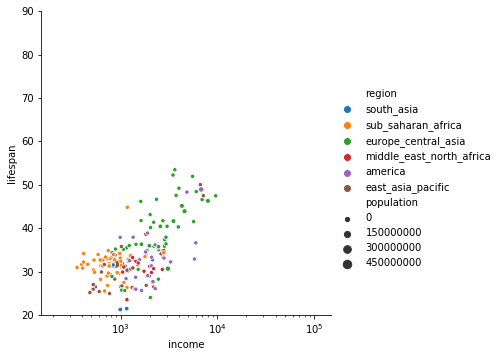

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

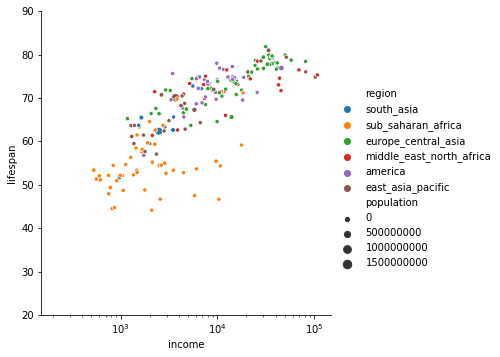

<IPython.core.display.Javascript object>

In [0]:
new_years = [1800, 1900, 2000]
new_tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(new_tb, new_years):
  sns.relplot(x='income', y='lifespan', hue='region', size='population', data=df[df.year==year])
  
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((20, 90))

In [0]:
import matplotlib.animation as animation